# Ricerca Tabelle simili su PubTables-1M

Il dataset **PubTables-1M (Table Structure Recognition Subset)** è una raccolta di quasi un milione di tabelle estratte da articoli scientifici, progettata per supportare attività come il riconoscimento della struttura delle tabelle e l'analisi funzionale. 

### **Caratteristiche principali del dataset**
Il dataset PubTables-1M è divisio in modo casuale in set di training, validation e test a livello di documento utilizzando una suddivisione 80/10/10. Per TSR (Table Structure Recognition), questo si traduce in 758.849 tabelle per training; 94.959 per validation; e 93.834 per testing. Si noti che queste tabelle occupano ciascuna una sola pagina: le tabelle che occupano più pagine sono considerate al di fuori dell'ambito di questo lavoro.

- ***Origine dei dati:*** le tabelle provengono da articoli scientifici, offrendo una varietà di strutture e formati reali.

- ***Struttura delle Cartelle:*** il dataset contiene 5 cartelle principali:  
    - *images*: immagini in formato JPG  
    - *train*: annotazioni delle bounding box degli oggetti in formato XML 
    - *test*: annotazioni delle bounding box degli oggetti in formato XML   
    - *val*: annotazioni delle bounding box degli oggetti in formato XML 
    - *words*: bounding box delle parole e testo in formato JSON


**Accesso al dataset:**
il dataset è disponibile su Kaggle al seguente link: https://www.kaggle.com/datasets/bsmock/pubtables-1m-structure/data

---

Il dataset è costituito da immagini di tabelle e file XML associati che descrivono la struttura delle tabelle, allora è sicuramente più efficiente e preciso utilizzare i file XML per estrarre le informazioni strutturali delle tabelle, piuttosto che cercare di estrarre queste informazioni direttamente dalle immagini. Inoltre nei file JSON è presente il testo contenuto dalle tabelle.

#### Esempio immagine tabella

Esempio di tabella in formato immagine:
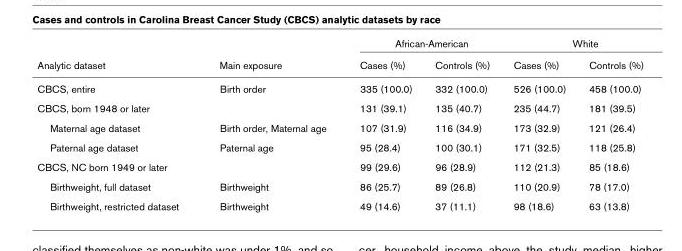

#### Esempio file XML

Un esempio di contenuto all'interno di un file XML corrispondente alla precedente tabella è il seguente:

```XML
<!-- XML della tabella precedente -->
<?xml version="1.0" ?>
<annotation>
   <folder/>
   <filename>PMC1064078_table_0.jpg</filename> // indicato il nome del file
   <path>PMC1064078_table_0.jpg</path> // indica il percorso del file
   <source>
      <database>PubTables1M-Structure</database>
   </source>
   <size> // dimensioni della immagine che contiene la tabella
      <width>682</width>
      <height>251</height>
      <depth>3</depth>
   </size>
   <segmented>0</segmented>
   <object>
      <name>table</name> // informazioni sulla tabella
      <pose>Frontal</pose>
      <truncated>0</truncated>
      <difficult>0</difficult>
      <occluded>0</occluded>
      <bndbox> // boundingbox che ci descrive l'estensione della tabella rispetto all'immagine
         <xmin>36.5556</xmin>
         <ymin>36.6853</ymin>
         <xmax>643.1767</xmax>
         <ymax>211.7458</ymax>
      </bndbox>
   </object>
   <object>
      <name>table spanning cell</name> // cella che si estende su più colonne o righe
      <pose>Frontal</pose>
      <truncated>0</truncated>
      <difficult>0</difficult>
      <occluded>0</occluded>
      <bndbox>
         <xmin>36.5556</xmin>
         <ymin>36.6853</ymin>
         <xmax>198.5530</xmax>
         <ymax>76.3748</ymax>
      </bndbox>
   </object>
   [...]
   <object>
      <name>table column header</name> // testata della colonna della tabella
      <pose>Frontal</pose>
      <truncated>0</truncated>
      <difficult>0</difficult>
      <occluded>0</occluded>
      <bndbox>
         <xmin>36.5556</xmin>
         <ymin>36.6853</ymin>
         <xmax>643.1767</xmax>
         <ymax>76.3748</ymax>
      </bndbox>
   </object>
   <object>
      <name>table row</name> // riga della tabella
      <pose>Frontal</pose>
      <truncated>0</truncated>
      <difficult>0</difficult>
      <occluded>0</occluded>
      <bndbox>
         <xmin>36.5556</xmin>
         <ymin>36.6853</ymin>
         <xmax>643.1767</xmax>
         <ymax>53.5717</ymax>
      </bndbox>
   </object>
   [...]
   <object>
      <name>table column</name> // colonna della tabella
      <pose>Frontal</pose>
      <truncated>0</truncated>
      <difficult>0</difficult>
      <occluded>0</occluded>
      <bndbox>
         <xmin>36.5556</xmin>
         <ymin>36.6853</ymin>
         <xmax>198.5530</xmax>
         <ymax>211.7458</ymax>
      </bndbox>
   </object>
   [...]
</annotation>
```

Come è possibile notare dell'esempio, il **file XML** descrive la struttura della tabella presente nell'immagine associata annotando righe, colonne e celle con le relative informazioni. Esso contiene annotazioni relative agli elementi della tabella, specificando la loro posizione attraverso bounding box.  

#### **Struttura e contenuto del file XML**
I files XML del dataset seguono questo schema principale:
- **`<annotation>`**: nodo radice che contiene le annotazioni.
- **`<filename>` e `<path>`**: Nome e percorso dell'immagine corrispondente.
- **`<size>`**: Dimensioni dell'immagine (larghezza, altezza, profondità di colore).
- **`<object>`**: Descrive gli elementi della tabella (tabella, colonne, righe, celle, ecc.).

#### **Elementi presenti all'interno di  `<object>`**
All'interno di `<object>` si trova l'attributo **`<name>...</name>`** che indica il tipo di elemento della tabella che descrive. Il tag può avere le seguenti indicazioni: 
- *`<name>table</name>`*: descrive l'intera tabella.
- *`<name>table column header</name>`*: descrive l'intestazione della colonna.
- *`<name>table projected row header</name>`*: indica un'intestazione di riga proiettata, ovvero una cella che funge da etichetta per una o più righe.
- *`<name>table column</name>`*: descrive una colonna della tabella.
- *`<name>table row</name>`*: descrive una riga della tabella.
- *`<name>table spanning cell</name>`*: descrive una cella che si estende su più colonne.

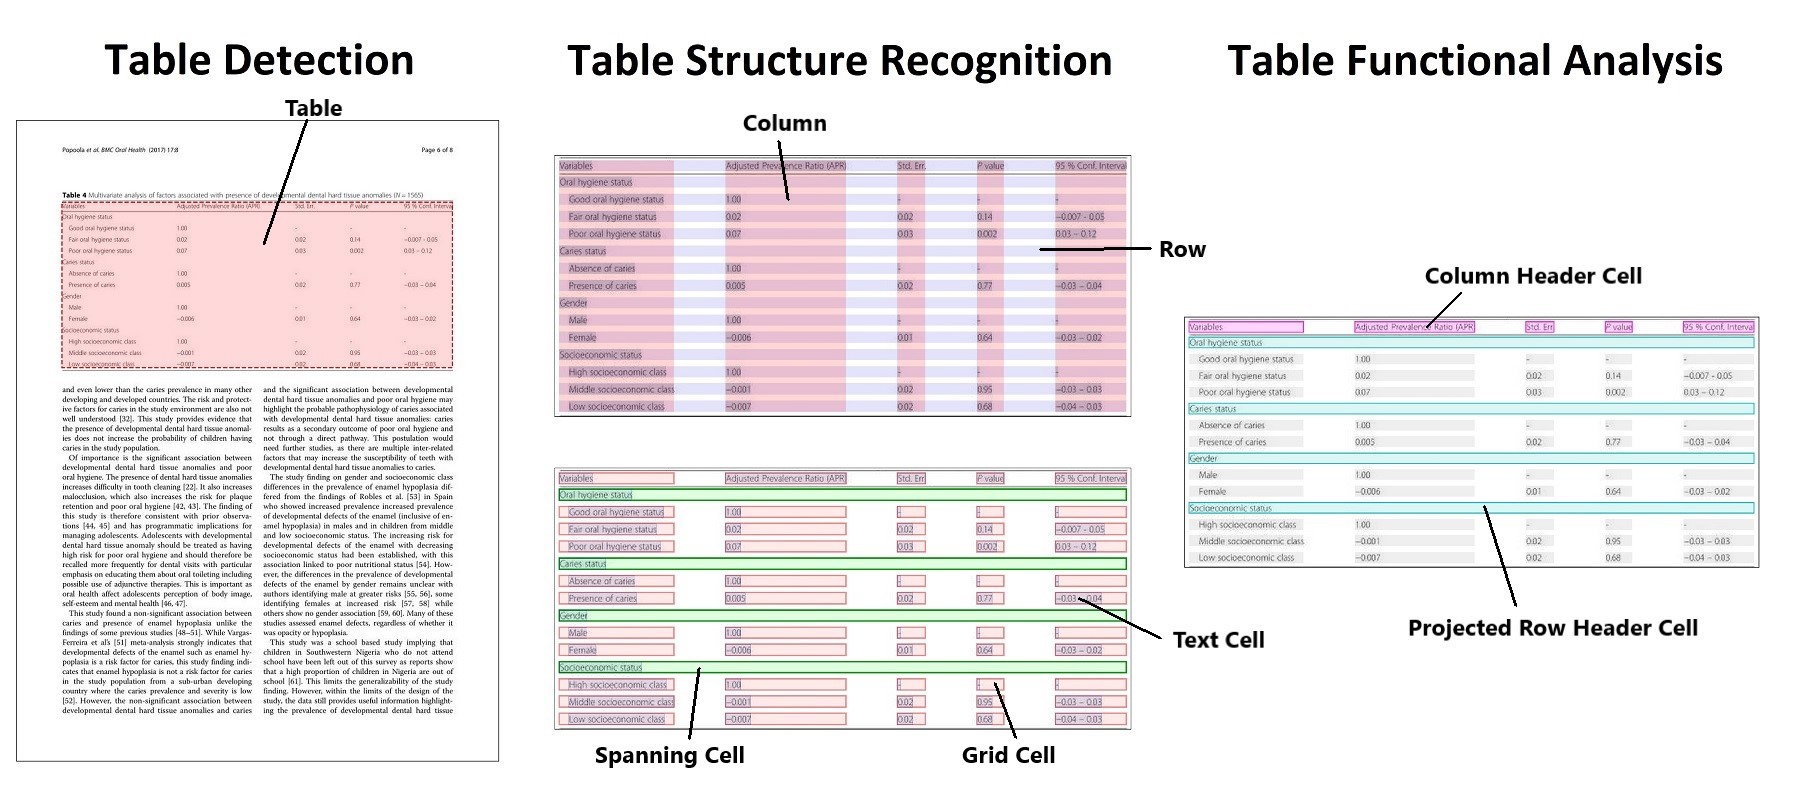

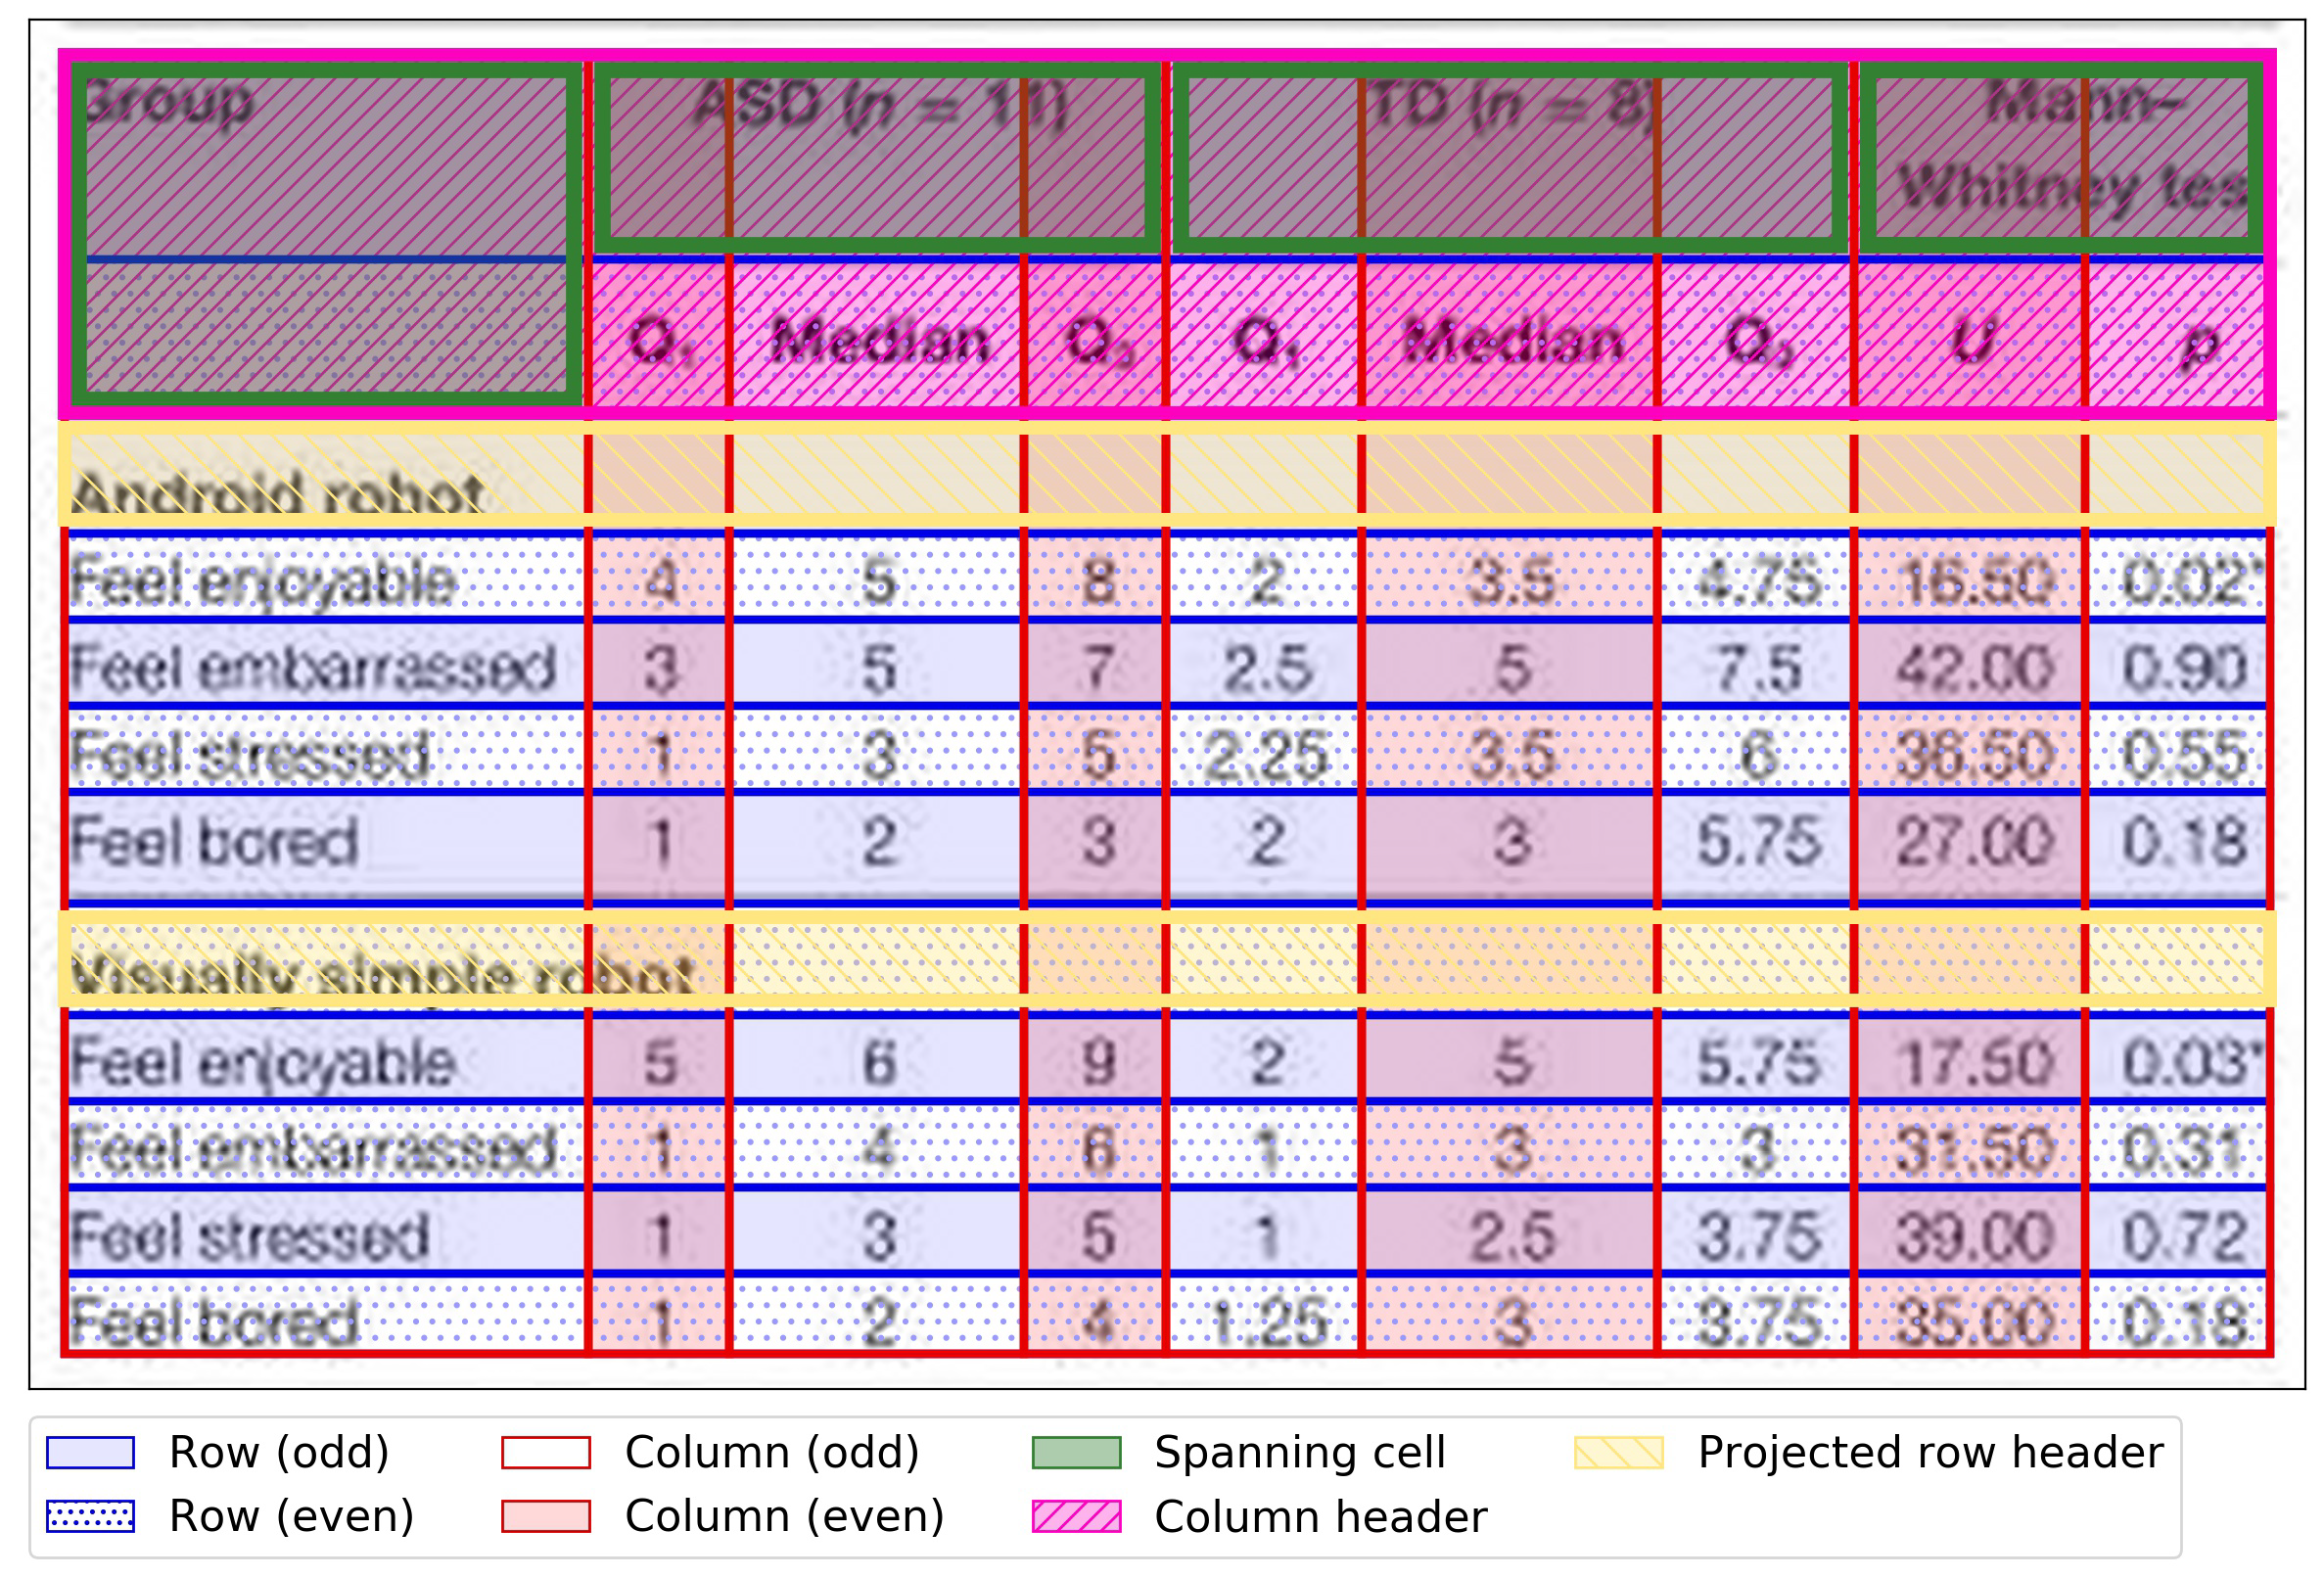

L'annotazione **`<pose>`** indica la posizione della tabella o dei suoi elementi rispetto all'osservatore. Il campo *pose* potrebbe avere altri valori come:
- `"Frontal"`: l'elemento è visto perfettamente di fronte.
- `"Side"`: vista laterale.
- `"Top"`: vista dall'alto.
- `"Oblique"`: vista inclinata.
Nel caso del dataset *PubTables-1M*, sembra che tutte le tabelle siano annotate con "Frontal", perché le immagini sono prese direttamente dai documenti senza inclinazioni.   

Inoltre in `<object>` si ha un bounding box, specificato dall'elemento **`<bndbox>`**, che indica le coordinate in pixel dell'elemento all'interno dell'immagine.

Gli altri attributi presenti all'interno di `<object>` sono i tag **`<truncated>`**, **`<difficult>`** e **`<occluded>`** sono attributi usati per descrivere la qualità della visualizzazione degli oggetti annotati nell'immagine. Questi tag sono spesso utilizzati in dataset di computer vision per indicare se un oggetto è parzialmente visibile o difficile da riconoscere.
- **`<truncated>...</truncated>`**: indica se l'oggetto è tagliato ai bordi dell'immagine. Se 0, l'oggetto è completamente visibile. Se 1, l'oggetto è parzialmente tagliato (es si trova sul bordo dell'immagine).
- **`<difficult>...</difficult>`**: indica se l'oggetto è difficile da riconoscere. Se 0, l'oggetto è chiaramente distinguibile. Se 1, l'oggetto è difficile da riconoscere (es basso contrasto o per sovrapposizioni).  
- **`<occluded>...</occluded>`**: indica se l'oggetto è parzialmente nascosto da altri oggetti. Se 0, l'oggetto è completamente visibile. Se 1, l'oggetto è parzialmente coperto da altri elementi (es una cella della tabella coperta da un'illustrazione o da un altro testo sovrapposto).  

**Riassumendo:**
| **Tag**        | **Descrizione** | **Valori possibili** | **Esempio** |
|---------------|---------------|------------------|------------|
| `<pose>` | Indica la posizione dell'oggetto rispetto all'osservatore. | `Frontal` (vista frontale), `Side` (laterale), `Top` (dall'alto), `Oblique` (inclinata) | `<pose>Frontal</pose>` |
| `<truncated>` | Indica se l'oggetto è tagliato ai bordi dell'immagine. | `0` (completo), `1` (parzialmente tagliato) | `<truncated>0</truncated>` |
| `<difficult>` | Indica se l'oggetto è difficile da riconoscere. | `0` (facile da rilevare), `1` (difficile da rilevare) | `<difficult>0</difficult>` |
| `<occluded>` | Indica se l'oggetto è parzialmente coperto da altri oggetti. | `0` (visibile), `1` (parzialmente nascosto) | `<occluded>0</occluded>` |
| `<bndbox>` | Definisce il rettangolo di delimitazione (bounding box) dell'oggetto nell'immagine. | Contiene `<xmin>`, `<ymin>`, `<xmax>`, `<ymax>` con coordinate in pixel. | ```xml <bndbox><xmin>36.5</xmin><ymin>36.6</ymin><xmax>643.1</xmax><ymax>211.7</ymax></bndbox>``` |

---

**IDEA**: visto che all'interno dei file xml è rappresentata le annotazioni relative alla struttura della tabella come verrebbe vista se fosse una immagine, l'idea è quella di estrarre da questo file xml informazioni utili per trovare la similarità tra tabelle e per farlo si potrebbe calcolare per ogni tabella:
- numero di righe,
- numero di colonne,
- celle che si estendono su più righe o colonne (spanning cells)
- numero di table column header
- numero di table projected row header
- posizioni delle celle?
- potrei cercare di capire se il contenuto delle tabelle è numerico (numeri percentuali o singoli), simboli (es. +, -, V, X) o se ci sono scritte --> però queste info non sono presenti nell'XML.

Se riuscissi ad estrarre queste informazioni potrei utilizzarle per confrontare la struttura delle tabelle e trovare quelle simili (secondo una certa metrica che poi deciderò). 
Questo approccio dovrebbe permettere di sfruttare le informazioni strutturali già presenti nei file XML, evitando la complessità di dover estrarre queste informazioni direttamente dalle immagini.

---

After 2 colloquio:
Quindi l'idea è di contare il numero di row, column, spanning cell, column header, projected row header all'interno del file XML e utilizzare questo conteggio per creare una features matrix che descrive brevemente la struttura della tabella. Quindi ogni tabella verrà rappresentata come un vettore di features, dove ogni features prende valore pari al numero di elementi del tipo corrispondente.

NB. row, column e spanning cell sono elementi presenti in tutte le tabelle, mentre column header e projected row header non tutte le tabelle li hanno. Per questo, questi ultimi valori possono essere importanti per distinguere possibili outliers o tabelle.

Per trovare tabelle identiche si potrebbe costruire una matrice delle similarità utilizzando una metrica si similarità coseno o sperimentarne altre. In questo caso ci interessa trovare tabelle identiche strutturalmente.

Un esperimento più interessante per trovare tabelle simili è quello di clusterizzare. Quindi l'obbiettivo è di trovare il miglior modo per clusterizzare le tabelle (suggerito di provare DBSCAN poichè meno costoso). L'algoritmo di clusterizzazione da utilizzare potrebbe essere da ottimizzare visto che ho tanti dati.
Nel caso della clusterizzazione ci interessa trovare e studiare gli outliers.

Una ulteriore possibile analisi potrebbe essere guardare il contenuto delle tabelle e trovare tabelle strutturalmente simili in base al contenuto delle celle (testuale o numeri o segni).

---

### Calcolare `num_rows`, `num_cols`, `num_spanning_cells`, `num_column_headers` e `num_projected_row_headers`

Dato che i file XML non contengono direttamente informazioni come `num_rows` (numero righe) etc, ma rappresentano la struttura della tabella attraverso elementi come `table row` etc, si può estrarre queste informazioni indirettamente analizzando gli elementi presenti nel file XML.

- **Conteggio delle Righe**: si può contare il numero di elementi `<object>` con `<name>table row</name>` per determinare il numero di righe (`num_rows`).

- **Conteggio delle Colonne**: si può contare il numero di elementi `<object>` con `<name>table column</name>` per determinare il numero di colonne (`num_cols`).

- **Conteggio delle celle estese (Spanning Cells)**: si può contare il numero di elementi `<object>` con `<name>table spanning cell</name>` per determinare il numero di celle che si estendono su più righe o colonne.

- **Conteggio delle intestazione delle colonne**: si può contare il numero di elementi `<object>` con `<name>table column header</name>` per determinare il numero di intestazione delle colonne (`num_column_headers`).

- **Conteggio delle intestazioni di riga proiettata**: si può contare il numero di elementi `<object>` con `<name>table projected row header</name>` per determinare il numero di intestazioni di riga proiettata (`num_projected_row_headers`).

- **Aggiungere altre features se necessario????** --TODO--

### Codice per estrarre informazioni dai file XML:

Per contare le righe, le colonne e le celle estese si utilizza `root.findall(".//object[name='table row/column/spanning cell/column header/projected row header']")`.
In seguito, si crea e si salva una matrice `features_matrix` che contiene il numero di ogni elemento strutturale di ogni tabella.

In [17]:
import os
import xml.etree.ElementTree as ET
import numpy as np

# Funzione per estrarre le caratteristiche strutturali da un file XML
def extract_structural_features(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Conta i vari tipi di elementi strutturali
    num_rows = len(root.findall(".//object[name='table row']"))
    num_cols = len(root.findall(".//object[name='table column']"))
    num_spanning_cells = len(root.findall(".//object[name='table spanning cell']"))
    num_column_headers = len(root.findall(".//object[name='table column header']"))
    num_projected_row_headers = len(root.findall(".//object[name='table projected row header']"))

    # Ritorna tutte le features come tupla
    return (num_rows, num_cols, num_spanning_cells, num_column_headers, num_projected_row_headers)


# Percorso della cartella contenente i file XML
folder_path = 'Primi20_PubTables/test'

# Ottieni la lista di tutti i file XML nella cartella
xml_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.xml')]

# Carica i file XML e estrai le caratteristiche
features_list = [extract_structural_features(xml_file) for xml_file in xml_files] # Sarà una lista contente numero righe, numero colonne, numero celle estese di ogni file XML, una dopo l'altra

# Crea una matrice di caratteristiche per tutte le tabelle
features_matrix = np.array(features_list) # Però viene troppo grossa forse se deve essere costituita da 1M di features_list

# Salva la matrice delle caratteristiche per uso successivo
np.save('features_matrix.npy', features_matrix)

Ora ogni riga della `features_matrix` sarà del tipo:

```
[num_rows, num_cols, num_spanning_cells, num_column_headers, num_projected_row_headers]
```

#### Osservazione:

Aggiungendo `column header` e `projected row header`, le features diventano **più discriminative**, soprattutto per identificare:
- **outliers** (tabelle con headers mancanti)
- **gruppi strutturalmente coerenti**

#### Normalizzazione:

Inoltre, potrebbe essere utile **normalizzare** la matrice delle caratteristiche se si vuole confrontare tabelle di dimensioni molto diverse (per questo si può usare `sklearn.preprocessing.StandardScaler` o `MinMaxScaler` (cosigliato per distanze euclidee)).

Di seguito è implementato lo StandardScaler (Media 0, Deviazione Standard 1), il quale è utile se si vuole che tutte le feature siano trattate in base alla loro distribuzione. 

In [21]:
from sklearn.preprocessing import StandardScaler

# Carica la matrice delle caratteristiche
features_matrix = np.load('features_matrix.npy')

# Inizializza e applica lo StandardScaler
scaler = StandardScaler()
features_matrix_scaled = scaler.fit_transform(features_matrix)

# Salva la versione normalizzata
np.save('features_matrix_scaled.npy', features_matrix_scaled)

A questo punto si può usare features_matrix_scaled al posto della versione non normalizzata quando vofliamo che le feature siano trattate in base alla loro distribuzione.

### Calcolo della Similarità

Si utilizza la similarità del coseno per confrontare le tabelle basandosi sulle caratteristiche estratte

In [24]:
from sklearn.metrics.pairwise import cosine_similarity # Similarità coseno controlla l'angolo tra i vettori. Più puntano nella stessa direzione più sono simili

# Carica la matrice delle caratteristiche
#features_matrix = np.load('features_matrix.npy')
features_matrix = np.load('features_matrix_scaled.npy') # Carico la matrice scalata

# Calcolo della similarità (con similarità del coseno)
similarity_matrix = cosine_similarity(features_matrix) # TODO: vedere se cambiare la metrica per il calcolo della similarità

# Salva la matrice di similarità per uso successivo
np.save('similarity_matrix.npy', similarity_matrix)

**NB**: Le matrici delle caratteristiche (`features_matrix`) e della similarità (`similarity_matrix`) vengono salvate in file .npy dopo essere state calcolate. Questo permette di riutilizzarle nelle celle successive senza doverle ricalcolare.

### Ricerca delle Tabelle Simili

Questa cella trova le tabelle più simili a una tabella di riferimento. Nel codice seguente è stata presa come tabella di riferimento la prima all'interno di similarity_matrix, indicata con reference_table_index = 0.

In [29]:
# Carica la matrice di similarità
similarity_matrix = np.load('similarity_matrix.npy')

# Ricerca delle tabelle simili (esempio con la prima tabella come riferimento)
reference_table_index = 0  # Come tabella di riferimento per la similitudine è stata presa la tabella 0 (prima tabella in similarity_matrix)
similar_tables_indices = np.argsort(similarity_matrix[reference_table_index])[::-1][1:6]  # Indice delle Top 5 tabelle simili a quella scelta

# Visualizzazione dei risultati
print("Tabelle simili trovate:")
for idx in similar_tables_indices:
    print(f"Tabella {xml_files[idx]}: Similarità = {similarity_matrix[reference_table_index][idx]}")

Tabelle simili trovate:
Tabella Primi20_PubTables/test\PMC1064078_table_4.xml: Similarità = 0.954014128285942
Tabella Primi20_PubTables/test\PMC1064879_table_0.xml: Similarità = 0.4317141870465461
Tabella Primi20_PubTables/test\PMC1064135_table_2.xml: Similarità = 0.3598814042113156
Tabella Primi20_PubTables/test\PMC1064078_table_5.xml: Similarità = 0.3157511640580993
Tabella Primi20_PubTables/test\PMC1064078_table_3.xml: Similarità = 0.30231906569468


### **Clustering e Visualizzazione dei Risultati**

Per identificare gli utliers all'interno del nostro dataset di tabelle viene utilizzato il clustering. Il clustering viene applicato alla 'features_matrix_scaled' (ovvero la matrice delle features normalizzata). 
Per scegliere il tipo di clustering da utilizzare è stato considerato che **KMeans** è semplice da usare ma può diventare **lento e poco scalabile** su dataset molto grandi come PubTables-1M (quasi un milione di tabelle). Inoltre, non è ottimo per scoprire **outlier** o strutture non sferiche nei dati. In più per usare KMeans dovremmo conoscere a priori quello che è il numero di cluster. Per questo motivo come algoritmo di clustering è stato. deciso di utilizzare DBSCAN (Density-Based).

#### **DBSCAN** (Density-Based)
Scelto di usare DBSCAN poichè:
- Non richiede di specificare il numero di cluster.
- Identifica **outlier** naturalmente.
- Buono per strutture non lineari.

**⚠️ Limite:** scala **male con dataset > 100k** senza ottimizzazioni. (Per questo motivo la scelta ottima potrebbe ricadere su HDBSCAn che è la variante di DBSCAN ottimizzata).

Per atturare il clustering con DBSCAN è stato utilizzato quello forntito dalla classe `DBSCAN` di **scikit-learn**, la quale accetta diversi parametri, ma quelli **più importanti** per la qualità del clustering sono principalmente due:
- `eps`: distanza massima tra due punti perché siano considerati vicini (epsilon-neighborhood). **Fondamentale per il risultato finale**. 
- `min_samples`: numero minimo di punti richiesti per formare un "core point". Di solito tra **3 e 10**, a seconda della densità del dataset.

Altri due parametri aggiuntivi interessanti (opzionali) da usare sono:
- `metric`: distanza da usare. Default: `"euclidean"`. Può essere anche `"manhattan"`, `"cosine"`, ecc. Nel nostro caso visto che la matrice di similarità è stata costruita la distanza cosine, per coerenza impostiamo quella cosine.
- `n_jobs`: numero di core CPU da usare in parallelo. `-1` per usare tutti. Questo è utile per ottimizzare la velocità con cui viene eseguito DBSCAN su 1M di elementi.

Gli import che ci saranno utili per eseguire l'analisi sono i seguenti:

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# ======== 1. Caricamento della feature matrix normalizzata ========
features_matrix_scaled = np.load('features_matrix_scaled.npy') # Carico la matrice scalata

Notare che si carica la matrice delle fetures normalizzata.

#### **Stimare il parametro eps di DBSCAN**

Il parametro `eps` è **sensibile alla scala**, per questo prima si usa `StandardScaler` per normalizzare la features matrix. Per scegliere il valore corretto di eps, l'idea è di usare il **k-distanze plot** per stimare `eps` in DBSCAN.
Il **k-distance plot** aiuta a trovare un buon valore per `eps`, osservando la distanza dal **k-esimo vicino più vicino** per ogni punto. In pratica:
- **`k = min_samples - 1`**, dove `min_samples` è il parametro che si usa in DBSCAN.
- Si ordina la distanza dal k-esimo vicino per tutti i punti.
- Si cerca nel grafico un punto in cui la curva mostra una **crescita improvvisa** ("gomito") → quello è un buon valore per `eps`.

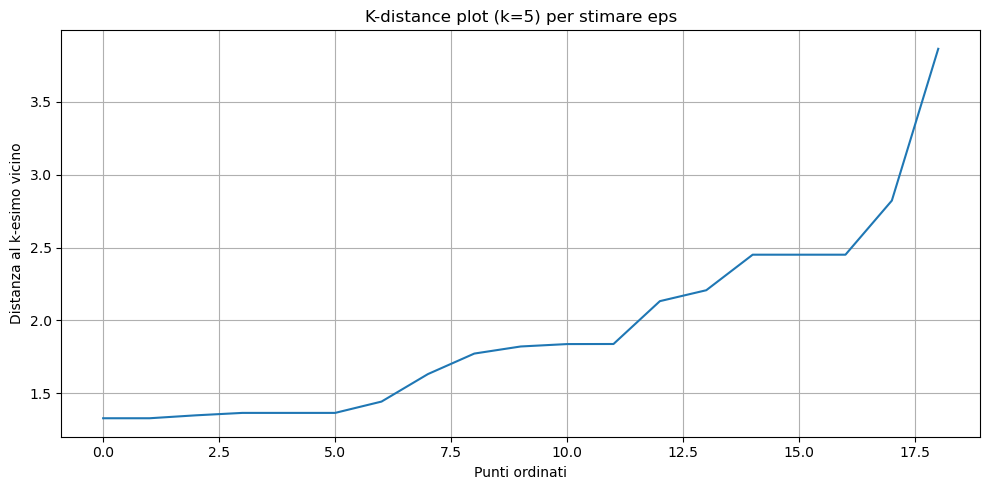

In [37]:
# ======== 2. Stima eps con K-distance plot (facoltativo) ========
# min_samples scelto in base al dominio o esperimenti (tipico: 5-10)
min_samples = 5
k = min_samples - 1

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(features_matrix_scaled)
distances, indices = neighbors_fit.kneighbors(features_matrix_scaled)
k_distances = np.sort(distances[:, k])

plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.title(f"K-distance plot (k={k+1}) per stimare eps")
plt.xlabel("Punti ordinati")
plt.ylabel("Distanza al k-esimo vicino")
plt.grid(True)
plt.tight_layout()
plt.show()

Possiamo notare che il gomito della curva è presente ad un eps = 2.2, per questo motivo sceglieremo proprio questo eps per applicare DBSCAN

---

#### **Applicazione DBSCAN**

Una volta stimato il valore eps si va ad eseguire il clustering delle tabelle.

In [43]:
# ======== 3. Clustering con DBSCAN ========
# Imposta eps secondo il gomito nel grafico precedente (modifica qui sotto!)
dbscan = DBSCAN(eps=2.2, min_samples=min_samples)  # Scegliere `eps` in base al plot
clusters = dbscan.fit_predict(features_matrix_scaled)

Il precedente codice realizza il clustering usando DBSCAN e lo salva in 'clusters' che verrà successivamente usato nella nostra analisi

#### **Visualizzazione grafico a barre per mostrare il numero di tabelle in ciascun cluster**

Eseguito DBSCAN si va a visualizza i risultati in un grafico a barre per mostrare il numero di tabelle in ciascun cluster. 
Per contare le tabelle per cluster si utilizza numpy.
Per creare il grafico a barre si utilizza matplotlib e seaborn.

C:\Users\giost\AppData\Local\Temp\ipykernel_7192\2217879426.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_clusters, y=counts, palette="viridis")


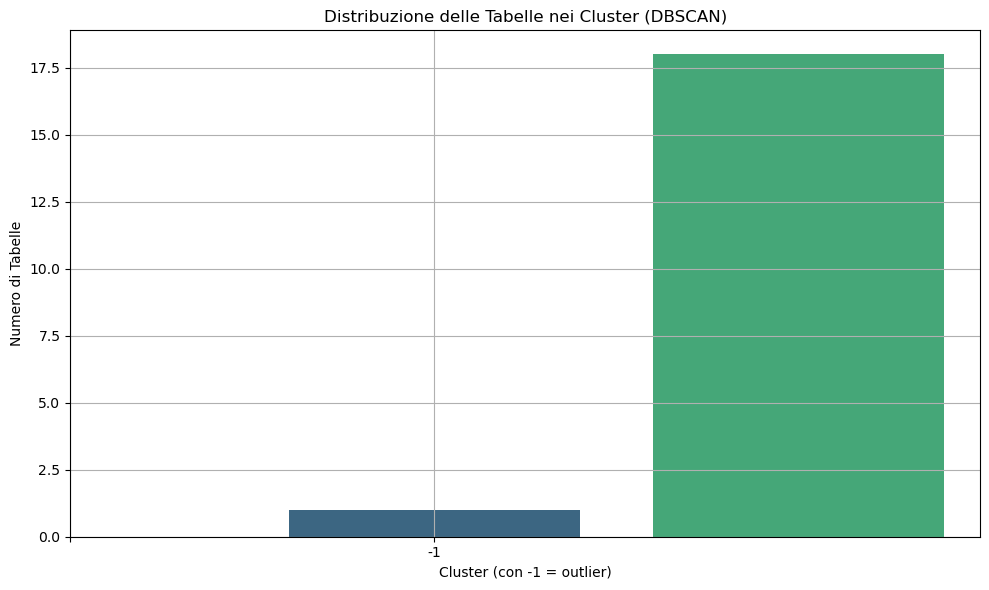

In [47]:
# ======== 4. Istogramma: numero di tabelle per cluster ========
unique_clusters, counts = np.unique(clusters, return_counts=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_clusters, y=counts, palette="viridis")
plt.title("Distribuzione delle Tabelle nei Cluster (DBSCAN)")
plt.xlabel("Cluster (con -1 = outlier)")
plt.ylabel("Numero di Tabelle")
plt.xticks(unique_clusters)
plt.grid(True)
plt.tight_layout()
plt.show()

---

#### **Visualizzare i cluster su 2D** con **PCA**

Per ottenere una ulteriore visualizzazione interessante dei cluster si va ad utilizzare la PCA. PCA è utile se vogliamo una trasformazione semplice e veloce per clustering o preprocessing, in modo da poter rappresentare in 2D il clustering ottenuto. Quindi scelto PCA poichè il dataset è composto da 1 milione di elementi e se si fosse scleto t-SNE avrei avuto una visualizzazione 2D migliore ma lenta nell'esecuzione.
In questo caso si applica sulla matrice `features_matrix_scaled`.

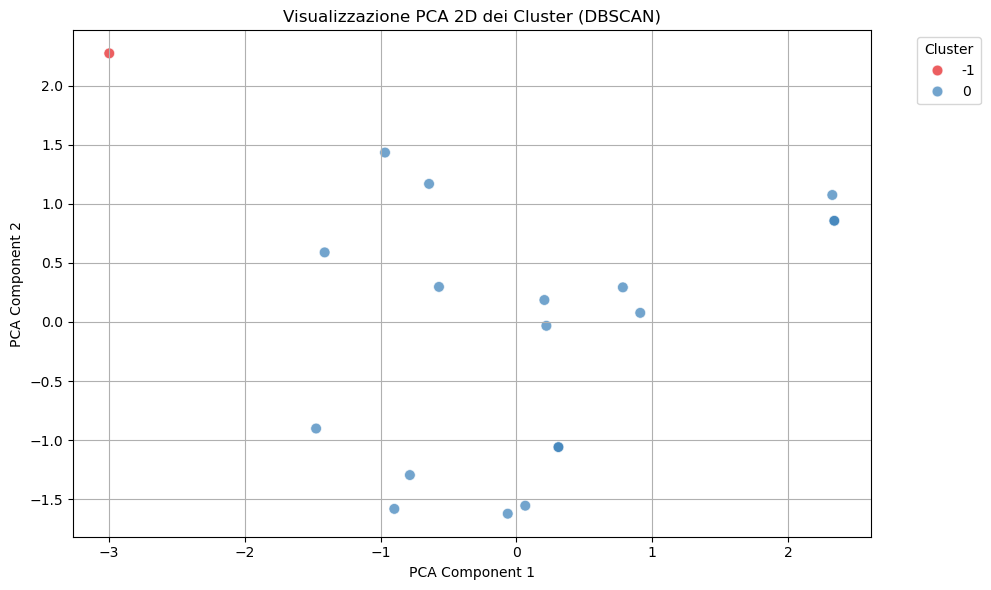

In [51]:
# ======== 5. Visualizzazione 2D con PCA ========
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_matrix_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features_pca[:, 0],
    y=features_pca[:, 1],
    hue=clusters,
    palette="Set1",  # Colori ad alto contrasto
    s=60,
    alpha=0.7,
)
plt.title("Visualizzazione PCA 2D dei Cluster (DBSCAN)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Quindi la **PCA** è veloce dando un'idea generale, ed è utile anche per il clustering stesso.

**NB**: il **cluster -1** sono gli **outlier** rilevati da DBSCAN.

---

Riassumendo con la precedente analisi si ottiene:

1. 📊 **Istogramma** del numero di tabelle per ogni cluster  
2. 📈 **Visualizzazione 2D con PCA** colorata per cluster